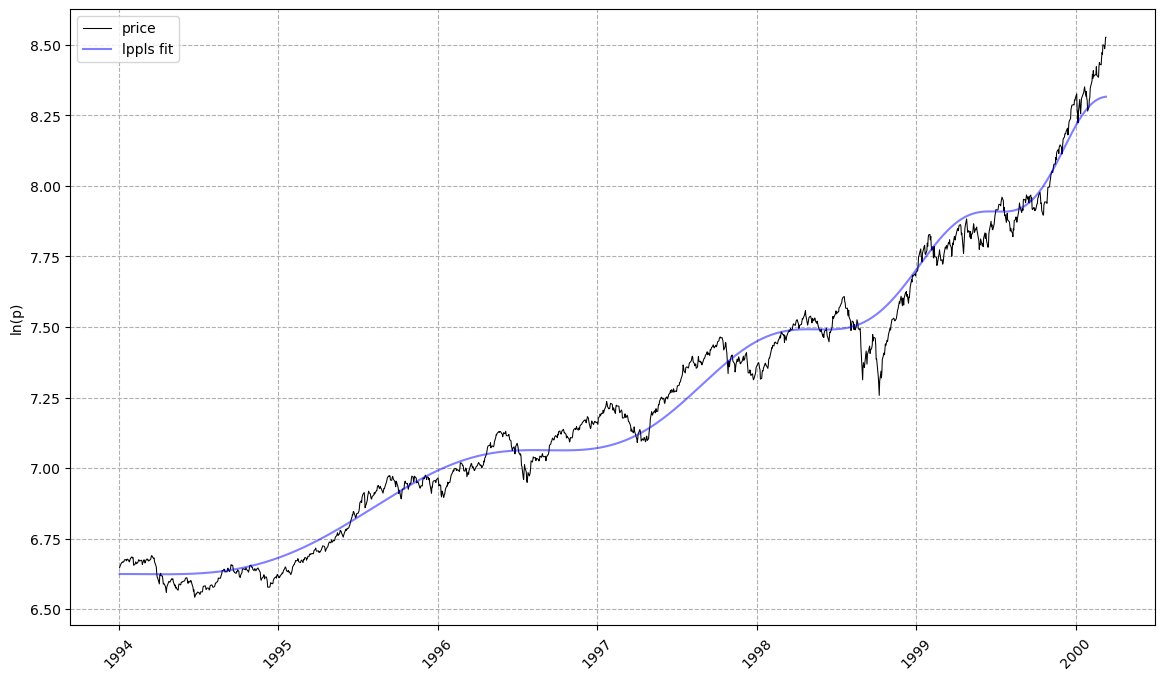

In [5]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

##  Example provided in the LPPLS Python Library 

# read example dataset into df 
data = data_loader.nasdaq_dotcom()

# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]

# create list of observation data
price = np.log(data['Adj Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()

100%|██████████| 1444/1444 [07:13<00:00,  3.33it/s]


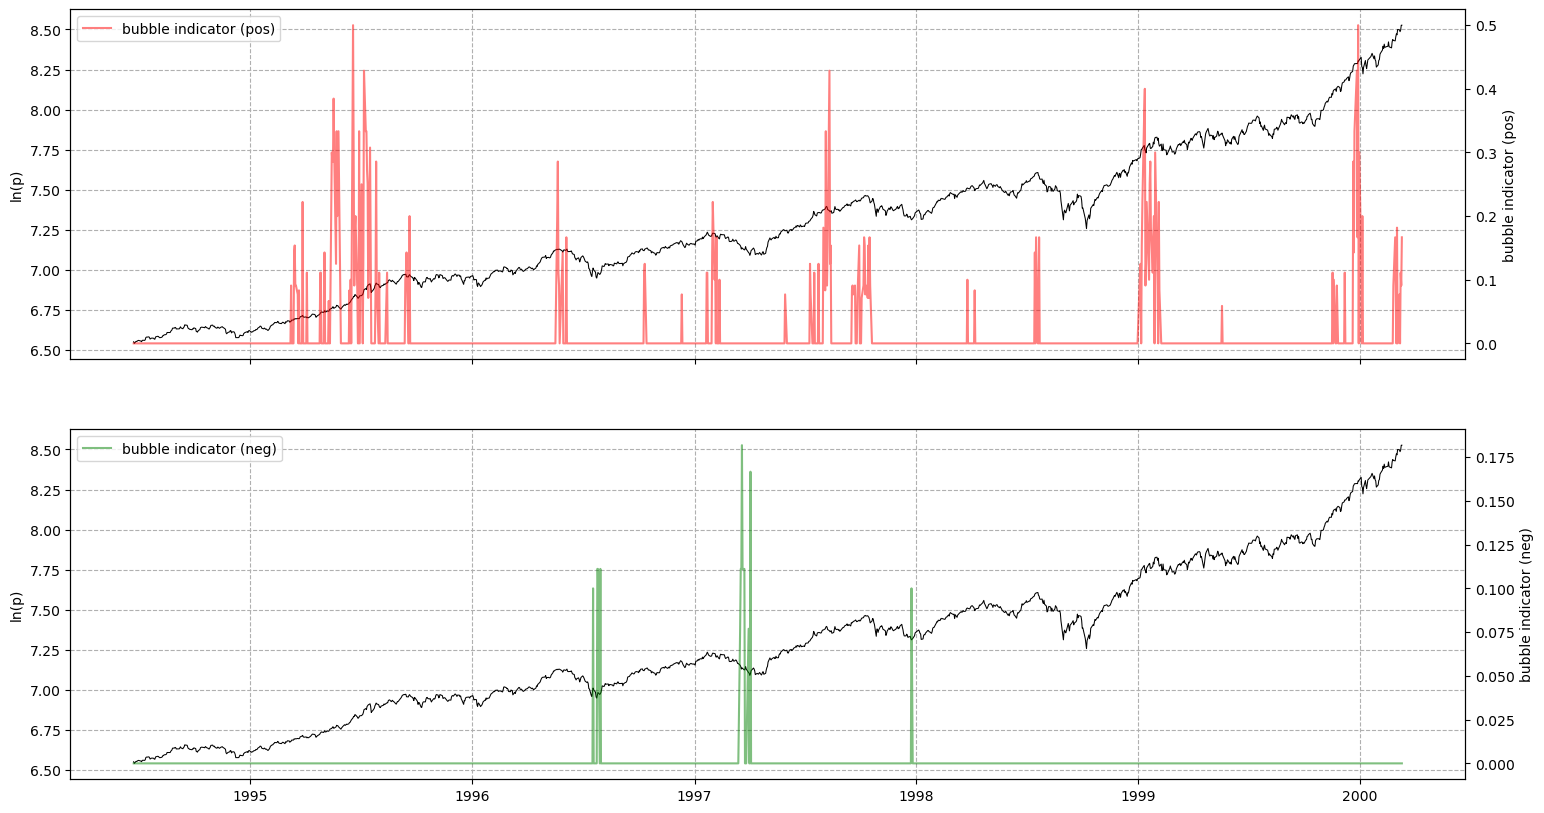

In [6]:
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120, 
    smallest_window_size=30, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)

In [7]:
# Libraries

from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import scienceplots 
import seaborn as sns
plt.style.use('science')
palette = sns.color_palette("muted")
%matplotlib inline

# Read data

columnas = ['Corriente', 'MOKE', 'MR']
url = 'Single_Jump/single_jump_Co.dat'
df = pd.read_csv(url, delim_whitespace=True, header =None, names = columnas)
df['MR'] = (-1)*df['MR']
df['Corriente'] = (-1)*df['Corriente']
df['Corriente'] = df['Corriente']-min(df['Corriente'])
l = len(df)
df['t']=range(len(df))

df1 = df[(df['Corriente']>=0.13923) & (df['Corriente']<=0.14359)]

(160_w,320)-aCMA-ES (mu_w=83.1,w_1=3%) in dimension 3 (seed=703814, Fri May 30 12:31:14 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    320 1.257711251900669e+00 1.0e+00 1.96e+00  2e-03  4e+00 0:00.2
    2    640 1.251841887080620e+00 1.6e+00 4.13e+00  7e-03  9e+00 0:00.4
    3    960 1.230039354013488e+00 2.9e+00 8.67e+00  2e-02  2e+01 0:00.6
   14   4480 1.136496017429410e+00 8.4e+00 8.05e+01  9e-02  5e+01 0:04.0
   23   7360 1.128759527405257e+00 7.4e+00 3.55e+02  6e-03  2e+00 0:08.3
   32  10240 1.128756258213639e+00 8.0e+00 2.53e+02  1e-05  5e-03 0:13.6
   42  13440 1.128756258174486e+00 8.8e+00 1.77e+02  1e-07  4e-05 0:18.2
1887.4077592000833


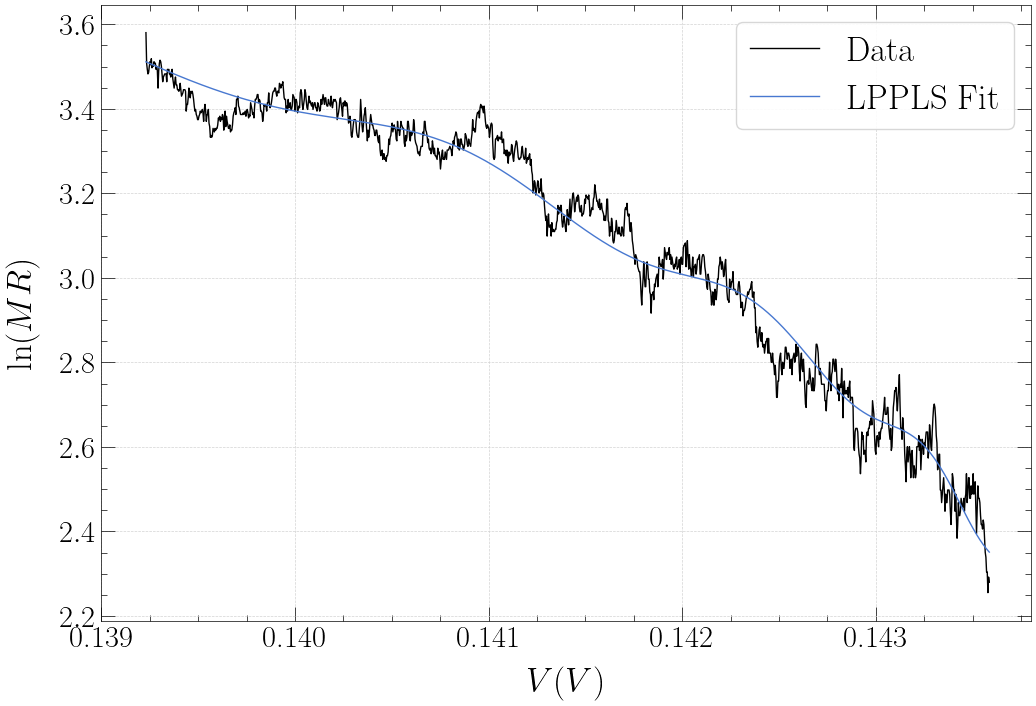

In [161]:
from lppls import lppls_cmaes
l = len(df1)
time = np.array(list(range(365,l+365)))
lMR = np.log(df1['MR'].values) 
observations = np.array([time,lMR])
MAX_SEARCHES = 25

#lppls_model = lppls.LPPLS(observations=observations)
#tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# better fit for the first three parameters
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=5,factor_sigma=0.001)
predictions = lppls_model.lppls(time, tc, m, w, a, b, c1, c2)
print(tc)

# Plot

plt.figure(figsize=(12,8))
plt.plot(time, lMR, label='Data', color='black')
plt.plot(time, predictions, label='LPPLS Fit', color=palette[0])
plt.xlabel('$V (V)$', fontsize=25, labelpad=10)
plt.ylabel('$\ln (MR)$', fontsize=25, labelpad=15)
plt.tick_params(axis='both', which='major', labelsize=22, right=True, top=True, length=10)
plt.tick_params(axis='both', which='minor', labelsize=22, right=True, top=True, length=4)
plt.legend(loc='upper right',frameon=True,facecolor='white',
           edgecolor='lightgrey',framealpha=0.9,fancybox=True,shadow=False,  fontsize=25)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgrey', zorder=0)

logical_labels = np.arange(0.139, 0.144, 0.001)

# Conversion of logical labels (voltage) to 'time' positions
V0, V1 = 0.13923, 0.14359
t0, t1 = 365, 1623
tick_positions = t0 + (t1 - t0) * (logical_labels - V0) / (V1 - V0)

# Ticks
plt.xticks(tick_positions, [f"{v:.3f}" for v in logical_labels], fontsize=22)
plt.show()

In [155]:
print('tc=',tc)
print('m=',m)
print('w=',w)
print('a=',a)
print('b=',b)
print('c1=',c1)
print('c2=',c2)

tc= 1658.190791863367
m= 0.46481866975345193
w= 9.386990169888675
a= 2.0571903368543363
b= 0.05348618871965446
c1= 0.0020241188041303856
c2= 0.0004971759722572701


100%|██████████| 1059/1059 [17:26<00:00,  1.01it/s]


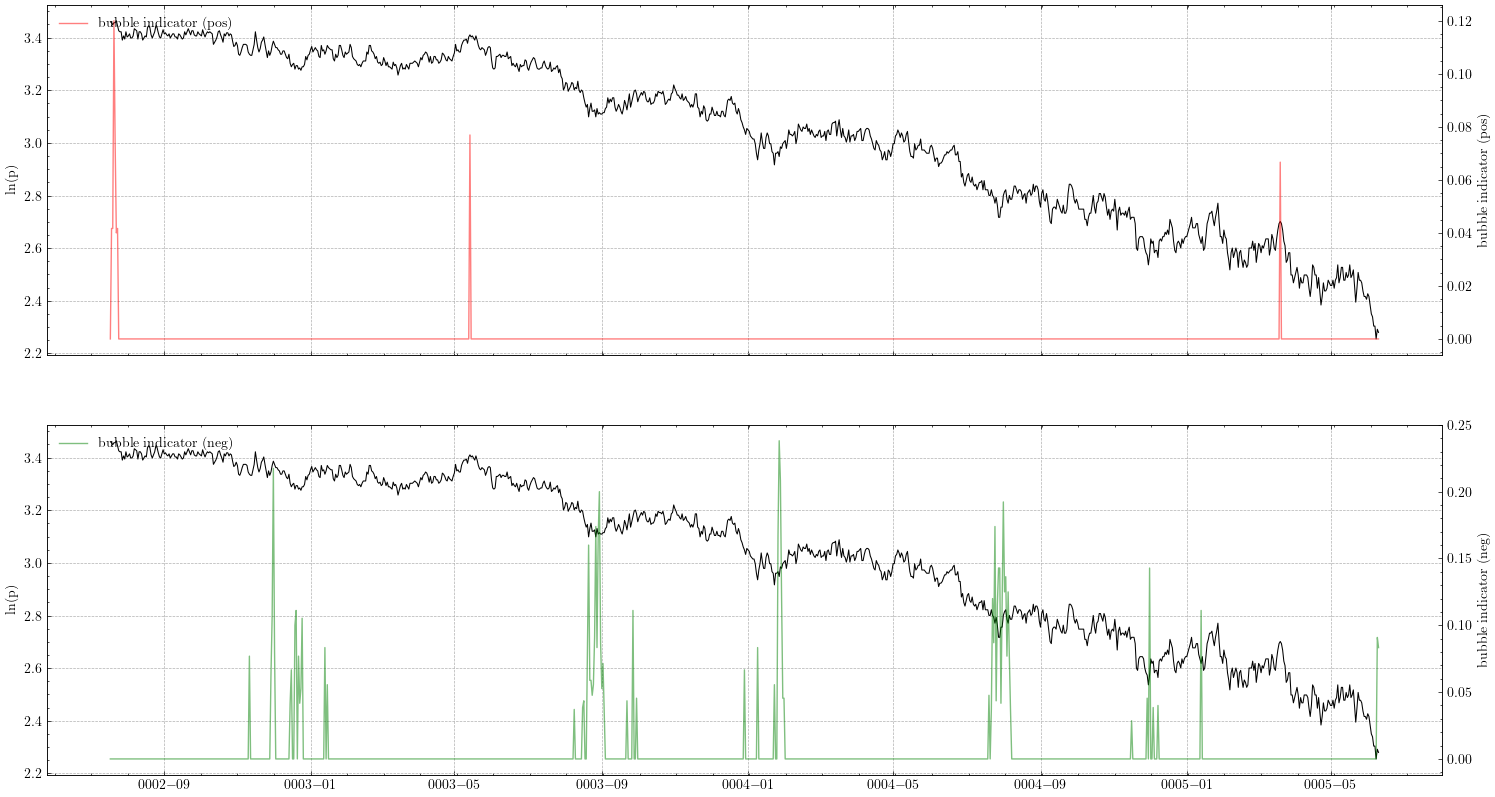

In [109]:
# Bubbles confidence indicators

res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=200,
    smallest_window_size=10,
    outer_increment=1,
    inner_increment=5,
    max_searches=25,
)

lppls_model.plot_confidence_indicators(res)

In [112]:
# Save file

import joblib
filename = 'lppls_nested_fits_results.joblib'
joblib.dump(res, filename)

['lppls_nested_fits_results.joblib']

In [94]:
# load file

filename = 'lppls_nested_fits_results.joblib'
res = joblib.load(filename)

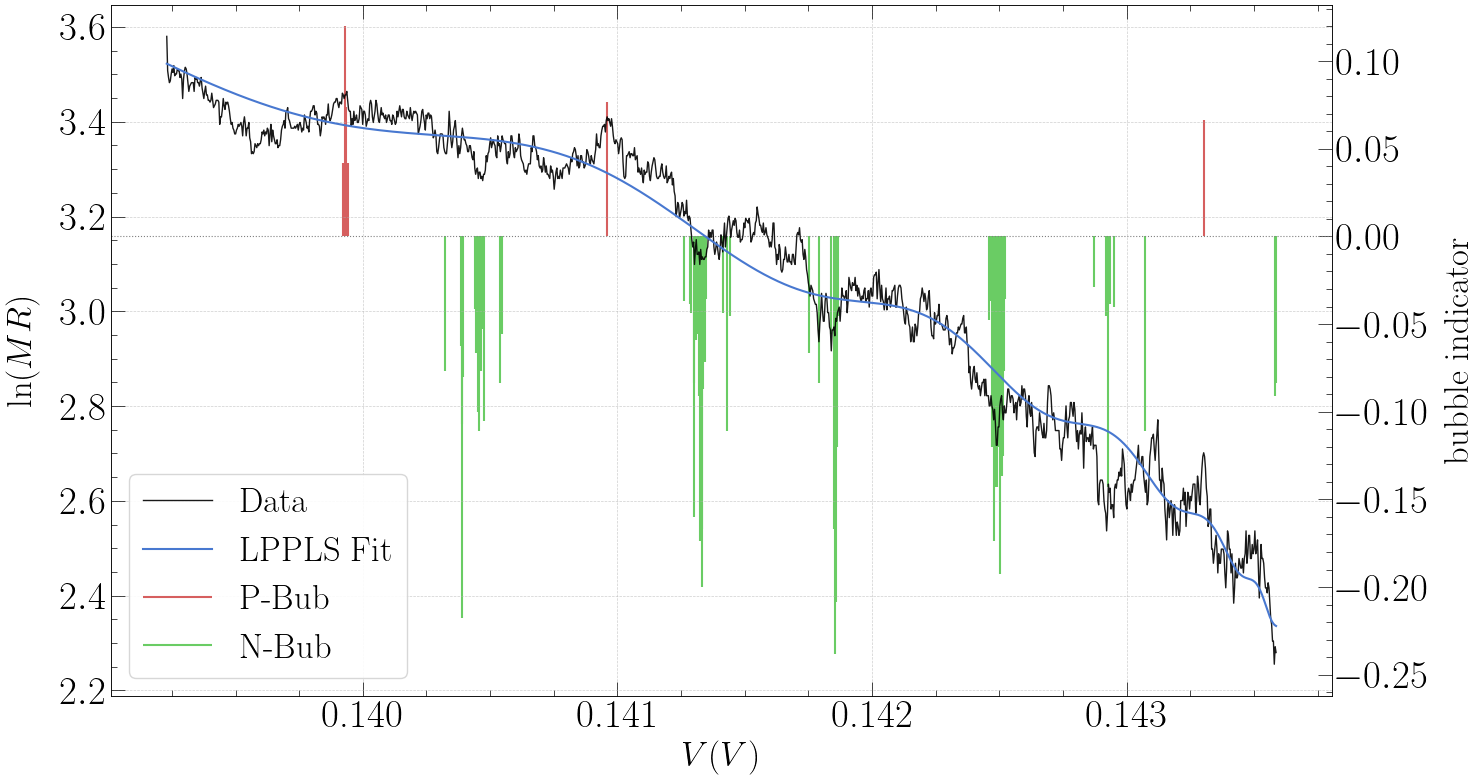

In [168]:
# Final plot

tc= 1658.190791863367
m= 0.46481866975345193
w= 9.386990169888675
a= 2.0571903368543363
b= 0.05348618871965446
c1= 0.0020241188041303856
c2= 0.0004971759722572701

df2 = df[(df['Corriente']>=0.134) & (df['Corriente']<=0.1436)]
l2 = len(df2)
time2 = np.array(list(range(365,l2+365)))

predictions = lppls_model.lppls(observations[0], tc, m, w, a, b, c1, c2)

res_df = lppls_model.compute_indicators(res)

res_df_filtered = res_df.dropna(subset=["time"])
ts_indicator = res_df_filtered["time"].values

pos_conf_series = res_df_filtered["pos_conf"]
neg_conf_series = res_df_filtered["neg_conf"]

fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.plot(observations[0], observations[1], color='black', alpha=0.9, label='Data')
#ax1.plot(time2, np.log(df2['MR']), color='black', alpha=0.9, label='Data')

ax1.plot(observations[0], predictions, label='LPPLS Fit', color=palette[0], linestyle='-', lw=1.5)

ax1.set_xlabel('$V (V)$', fontsize=25)
ax1.set_ylabel('$\ln (MR)$', color='black', fontsize=25, labelpad=15)
ax1.tick_params(axis='both',which='major',length=10, labelcolor='black', labelsize=28)
ax1.tick_params(axis='both',which='minor',length=4, labelcolor='black', labelsize=28)

ax1.grid(True, linestyle='--', alpha=0.6)

V0, V1 = 0.13923, 0.14359
t0, t1 = 365, 1623
logical_labels = np.array([0.139, 0.140, 0.141, 0.142, 0.143])

tick_positions = t0 + (t1 - t0) * (logical_labels - V0) / (V1 - V0)

ax1.set_xticks(tick_positions)
ax1.set_xticklabels([f"{v:.3f}" for v in logical_labels], fontsize=28)
ax2 = ax1.twinx()

ax1.set_zorder(ax2.get_zorder() + 1)
ax1.patch.set_visible(False)

ax2.set_ylabel('bubble indicator', fontsize=25, labelpad=10)
ax2.tick_params(axis='both',which='major',length=10, labelcolor='black', labelsize =28)
ax2.tick_params(axis='both',which='minor',length=4, labelcolor='black', labelsize=28)

positive_indicator_x = ts_indicator
positive_indicator_y = pos_conf_series

negative_indicator_x = ts_indicator
negative_indicator_y = -neg_conf_series

ax2.vlines(positive_indicator_x, 0, positive_indicator_y, color=palette[3], linestyle='-', lw=1.5, label='P-Bub')
ax2.vlines(negative_indicator_x, 0, negative_indicator_y, color=palette[2], linestyle='-', lw=1.5, label='N-Bub')

ax2.axhline(0, color='gray', linestyle=':', linewidth=0.8)

max_pos_val = pos_conf_series.max() if not pos_conf_series.empty else 0
max_neg_abs_val = neg_conf_series.max() if not neg_conf_series.empty else 0

if max_pos_val > 0 or max_neg_abs_val > 0:
    ax2.set_ylim(-max_neg_abs_val * 1.1, max_pos_val * 1.1)
else:
    ax2.set_ylim(-0.1, 0.1)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower left')
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left',frameon=True,facecolor='white',
           edgecolor='lightgrey',framealpha=0.9,fancybox=True,shadow=False,  fontsize=25)
plt.tight_layout()
#plt.savefig('bubbles_lppls.pdf')
plt.show()

In [65]:
print(tc) # Critical time parameter 

1723.3824261685359
